In [5]:
import pandas as pd
from pathlib import Path 
import re
import string
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
from lingua import Language, LanguageDetectorBuilder

In [2]:
df = pd.read_csv("11_6_fulldataset.csv", index_col= 0)

In [6]:
# drop duplicates by anon-id (this only refers to the post, not the account)
languages = [Language.LATIN, Language.ENGLISH]
detector = LanguageDetectorBuilder.from_languages(*languages).build()

def latin_exterminator(s):
    confidence_value = detector.compute_language_confidence(s, Language.LATIN)
    cv = float(f"{confidence_value:.2f}") 
    if cv >= 0.5:
        return None
    else: 
        return s

#use the latin exterminator
df['Text'] = df['Text'].apply(latin_exterminator)
df = df[df['Text'].notnull()]

#drop more latin stuff
df = df[~df['Text'].str.contains('imago', case=False, na=False)]
df = df[~df['Text'].str.contains('amplissimus', case=False, na=False)]

# drop duplicates by anon-id (this only refers to the post, not the account)
df = df.drop_duplicates(subset = 'anonid', keep = 'last')

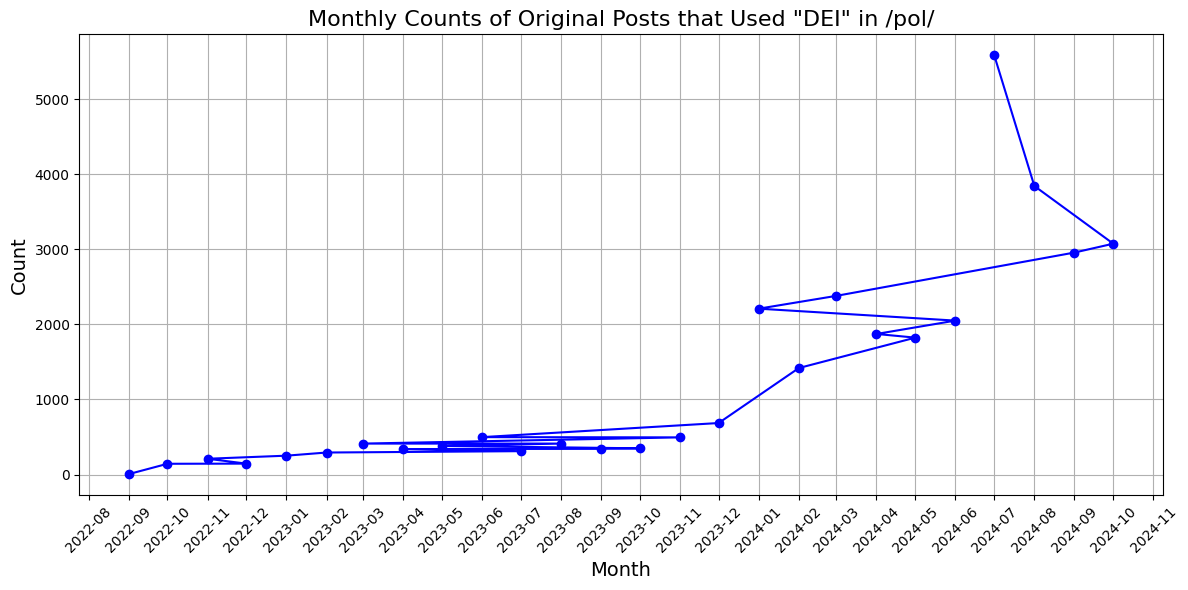

In [9]:
df['date'] = pd.to_datetime(df['date'], format='%a %d %b %Y %H:%M:%S')

# time series visualization, converting dates into week buckets
start_date = '2022-09-01'
end_date = "2024-10-31"

postdf = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
postdf ['month'] = postdf['date'].dt.to_period('M').apply(lambda r: r.start_time)

month_counts = postdf['month'].value_counts().reset_index()
month_counts.columns = ['month', 'count']

date = month_counts['month'] 
value = month_counts ['count']

plt.figure(figsize=(12, 6))

plt.plot(date, value, marker='o', linestyle='-', color='b')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  

plt.title('Monthly Counts of Original Posts that Used "DEI" in /pol/', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
#plt.show()